<a href="https://colab.research.google.com/github/sagarputhalapattu/projects/blob/main/Algorithmic_Trading_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install yfinance


In [51]:
import yfinance as yf
import pandas as pd

In [52]:
df = yf.download('TATAMOTORS.NS')



[*********************100%***********************]  1 of 1 completed


In [53]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
1991-01-02,15.690224,21.857864,21.857864,20.959597,20.959597,0
1991-01-03,15.690224,21.857864,21.857864,20.959597,20.959597,0
1991-01-04,15.690224,21.857864,21.857864,21.857864,21.857864,0
1991-01-07,15.152889,21.109308,21.259020,20.061329,20.360750,0
1991-01-08,15.152889,21.109308,21.109308,21.109308,21.109308,0


In [54]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

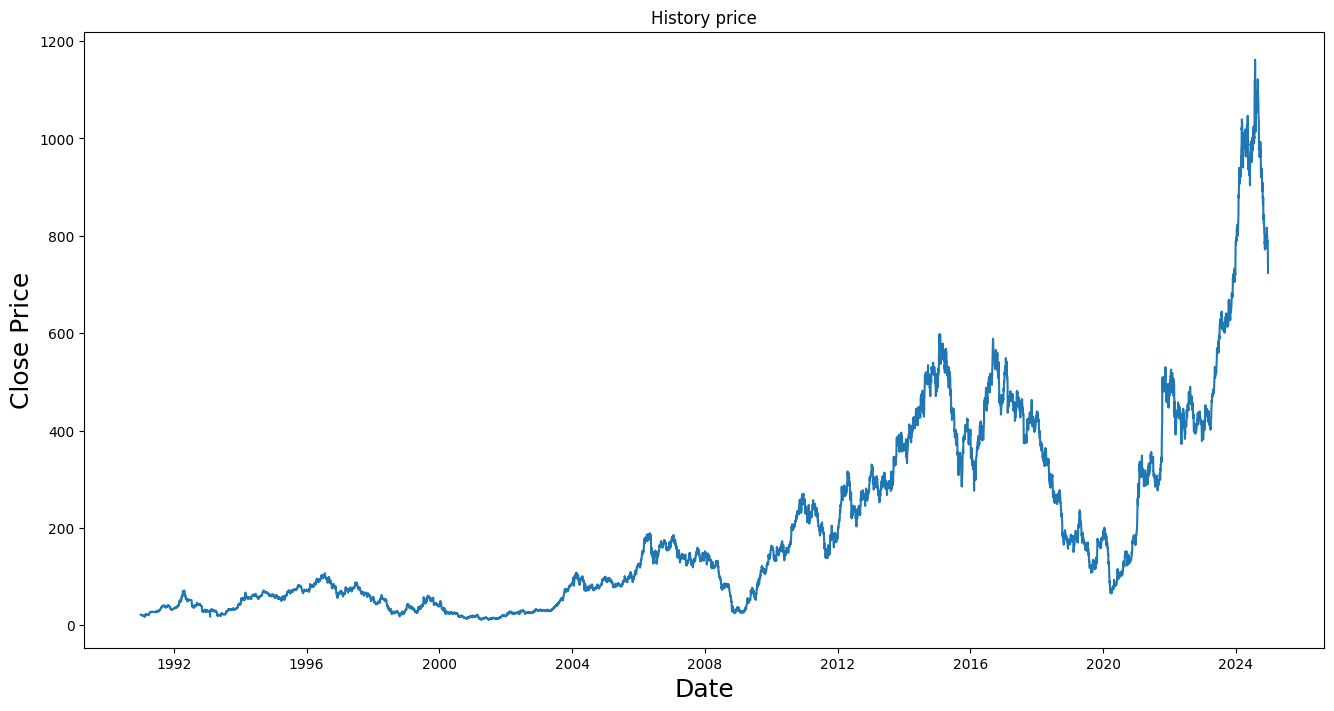

In [55]:
plt.figure(figsize=(16,8))
plt.title('History price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
scaled_df

array([[0.00920402],
       [0.00920402],
       [0.00920402],
       ...,
       [0.64700479],
       [0.63687946],
       [0.61949696]])

In [57]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

6865

In [58]:
train_data = scaled_df[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00920402, 0.00920402, 0.00920402, 0.00855344, 0.00855344,
       0.00803296, 0.00803296, 0.00842332, 0.00790284, 0.00790284,
       0.00790284, 0.00790284, 0.00790284, 0.00790284, 0.00790284,
       0.00764261, 0.00738237, 0.0068619 , 0.0068619 , 0.0068619 ,
       0.0068619 , 0.00712214, 0.00738237, 0.00764261, 0.00764261,
       0.00764261, 0.00712214, 0.00660167, 0.00608119, 0.00608119,
       0.00517037, 0.0054306 , 0.00556072, 0.00556072, 0.00790284,
       0.00751249, 0.00738237, 0.00816308, 0.00816308, 0.00959438,
       0.01024497, 0.0097245 , 0.0097245 , 0.0097245 , 0.00998473,
       0.00998473, 0.00920402, 0.00946426, 0.00907391, 0.00907391,
       0.00907391, 0.00907391, 0.00907391, 0.00868355, 0.00868355,
       0.00842332, 0.00842332, 0.00816308, 0.00842332, 0.0082932 ])]
[0.008163081024622511]



In [59]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(6805, 60, 1)

# **Modelling**

In [60]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=40,epochs=20)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0045
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 9.6989e-05
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 8.9470e-05
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 7.3600e-05
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 7.1458e-05
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 9.0879e-05
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 6.5107e-05
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 5.8125e-05
Epoch 9/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 6.1699e-05
Epoch 10/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 5.1383e-05
Epoch 11/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - loss: 4.5048e-05
Epoch 12/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - loss: 4.4512e-05
Epoch 13/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 4.2781e-05
Epoch 14/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/s

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# ... (rest of your code)

test_data = scaled_df[training_data_len - 60: , :]
x_test = []
# Change this line to select 'Close' column and slice by position
y_test = df['Close'].iloc[training_data_len:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# ... (rest of your code)

In [63]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


3.125242313304981

<ipython-input-65-24e5f7d54666>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


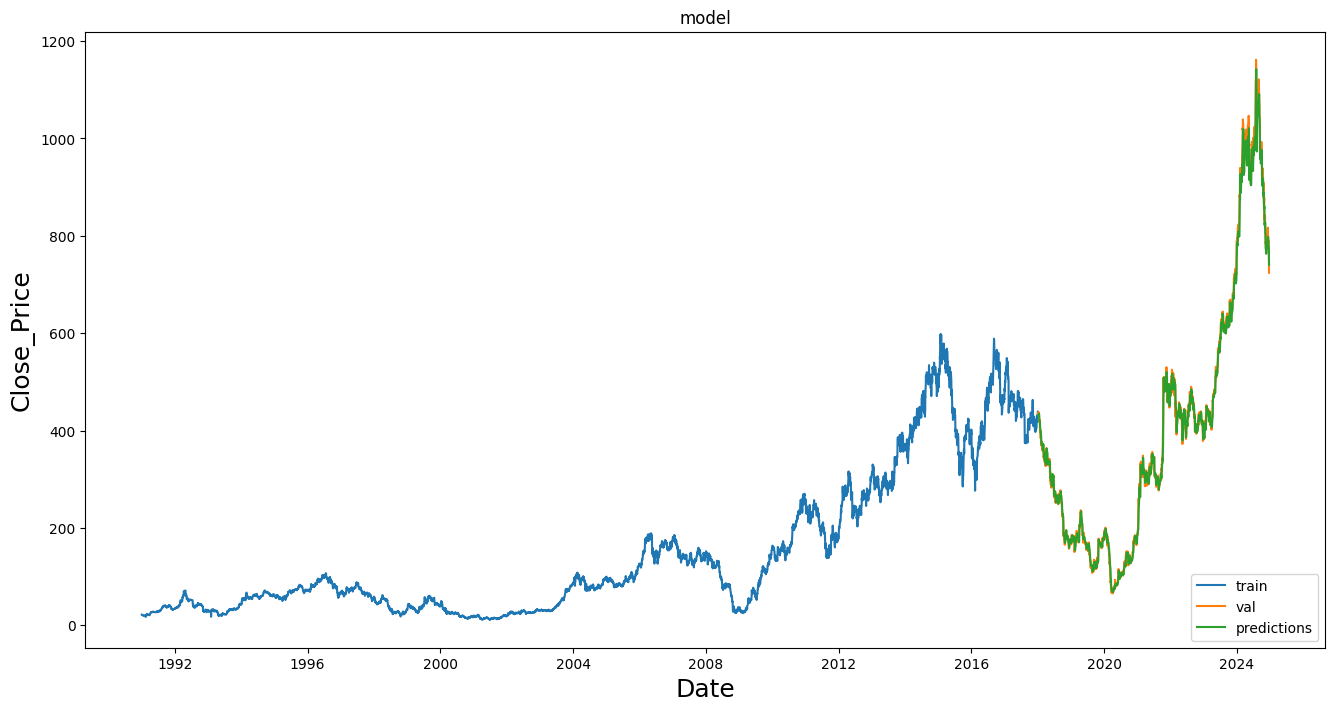

In [65]:
# ... previous code ...

# Assign df to data
data = df

train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

<ipython-input-73-03a07534dfa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


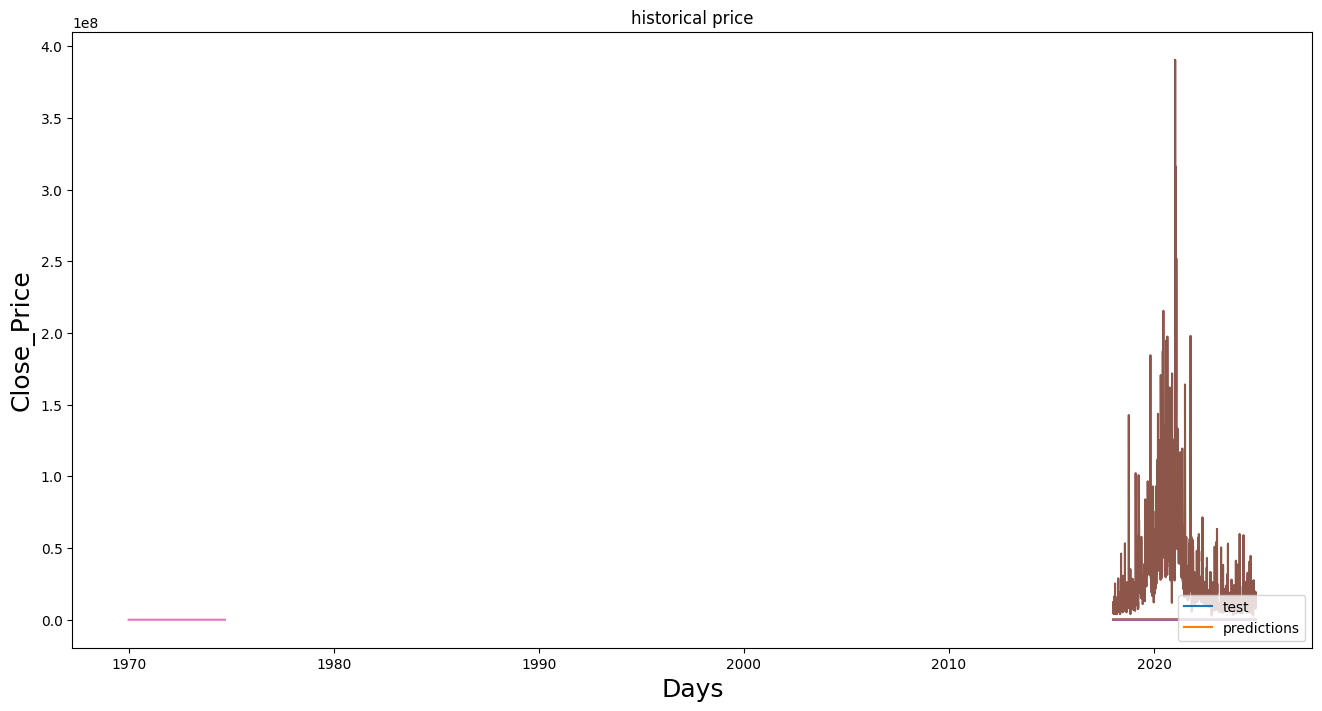

In [73]:
test = df[training_data_len:]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()